In [1]:
import pandas as pd
import numpy as np
import os
import torch
import torchaudio
import librosa
import soundfile
import IPython.display as ipd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
wav_path = "/network/datasets/restricted/icmlexvo2022_users/icmlexvo2022.var/icmlexvo2022_extract/wav"

In [3]:
def parse_file_id(file_id):
    file_id = str(file_id)
    while len(file_id) < 5:
        file_id = "0" + file_id
    return file_id

def get_wav(idx):
    idx = parse_file_id(idx)
    
    path = os.path.join(wav_path, f"{idx}.wav")
    data, sr = soundfile.read(path)
    if data.ndim == 2:
        data = data.mean(axis=1)
    return data.astype(np.float32), sr

In [4]:
def display_audio(data, sr=16000):
    ipd.display(ipd.Audio(data, rate=sr))
    
data, sr = get_wav(0)
display_audio(data, sr)

In [6]:
def audio2mel(audio, sr, hop_length, n_fft, n_mels, logmag=False):
    melspec = torchaudio.transforms.MelSpectrogram(
        sr,
        hop_length=hop_length,
        n_fft=n_fft,
        n_mels=n_mels
    )
    melspec.mel_scale.fb = torch.tensor(
        librosa.filters.mel(sr=sr, n_mels=n_mels, n_fft=n_fft, norm=1).T
    )
    
    audio = torch.Tensor(audio)
    mel = melspec(audio).detach()
    
    if logmag:
        mel = torch.log(mel+1e-6)/2.0
        
    return mel

def mel2audio(mel, sr, hop_length, n_fft, n_mels, logmag=False):
    mel = mel.numpy()
    if logmag:
        mel = np.exp(2.0*mel)-1e-6
    return librosa.feature.inverse.mel_to_audio(mel, sr=sr, n_fft=n_fft, hop_length=hop_length, norm=1)

def display_roundtrip_audio(audio, sr, hop_length, n_fft, n_mels):
    mel = audio2mel(audio, sr, hop_length, n_fft, n_mels, logmag=True)
    print(mel.shape)
    audio = mel2audio(mel, sr, hop_length, n_fft, n_mels, logmag=True)
    plt.plot(audio, label=f"{hop_length} {n_mels}")
    display_audio(audio, sr)

============ Sample 0 ============
Original:
Length: 2.16


Modified (128, 128)
torch.Size([128, 271])


Modified (256, 128)
torch.Size([128, 136])


Modified (128, 256)
torch.Size([256, 271])


Modified (256, 256)
torch.Size([256, 136])


Modified (192, 256)
torch.Size([256, 181])


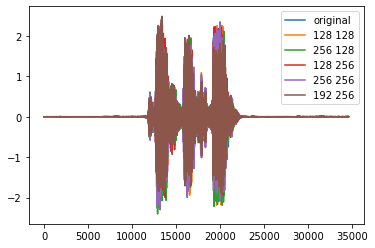


============ Sample 1 ============
Original:
Length: 4.02


Modified (128, 128)
torch.Size([128, 503])


Modified (256, 128)
torch.Size([128, 252])


Modified (128, 256)
torch.Size([256, 503])


Modified (256, 256)
torch.Size([256, 252])


Modified (192, 256)
torch.Size([256, 336])


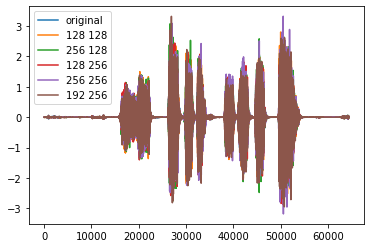


============ Sample 2 ============
Original:
Length: 2.76


Modified (128, 128)
torch.Size([128, 346])


Modified (256, 128)
torch.Size([128, 173])


Modified (128, 256)
torch.Size([256, 346])


Modified (256, 256)
torch.Size([256, 173])


Modified (192, 256)
torch.Size([256, 231])


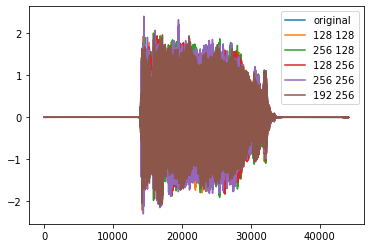


============ Sample 3 ============
Original:
Length: 5.34


Modified (128, 128)
torch.Size([128, 668])


Modified (256, 128)
torch.Size([128, 334])


Modified (128, 256)
torch.Size([256, 668])


Modified (256, 256)
torch.Size([256, 334])


Modified (192, 256)
torch.Size([256, 446])


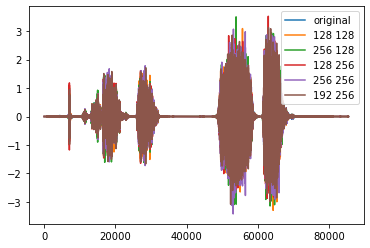


============ Sample 4 ============
Original:
Length: 4.92


Modified (128, 128)
torch.Size([128, 616])


Modified (256, 128)
torch.Size([128, 308])


Modified (128, 256)
torch.Size([256, 616])


Modified (256, 256)
torch.Size([256, 308])


Modified (192, 256)
torch.Size([256, 411])


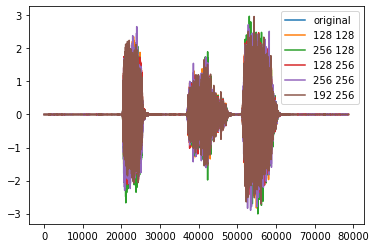


============ Sample 5 ============
Original:
Length: 2.64


Modified (128, 128)
torch.Size([128, 331])


Modified (256, 128)
torch.Size([128, 166])


Modified (128, 256)
torch.Size([256, 331])


Modified (256, 256)
torch.Size([256, 166])


Modified (192, 256)
torch.Size([256, 221])


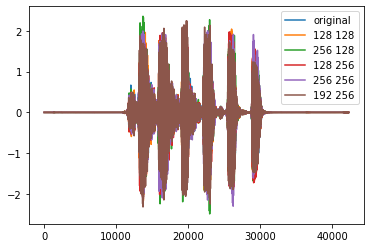


============ Sample 6 ============
Original:
Length: 4.5


Modified (128, 128)
torch.Size([128, 563])


Modified (256, 128)
torch.Size([128, 282])


Modified (128, 256)
torch.Size([256, 563])


Modified (256, 256)
torch.Size([256, 282])


Modified (192, 256)
torch.Size([256, 376])


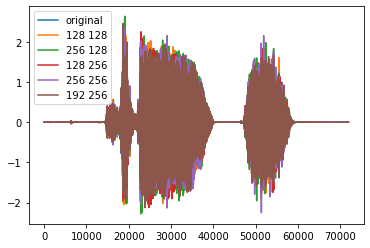


============ Sample 7 ============
Original:
Length: 2.34


Modified (128, 128)
torch.Size([128, 293])


Modified (256, 128)
torch.Size([128, 147])


Modified (128, 256)
torch.Size([256, 293])


Modified (256, 256)
torch.Size([256, 147])


Modified (192, 256)
torch.Size([256, 196])


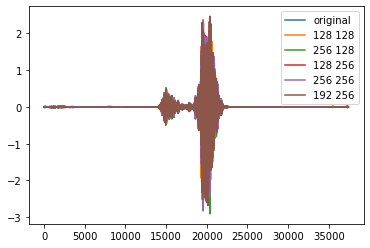


============ Sample 8 ============
Original:
Length: 2.1


Modified (128, 128)
torch.Size([128, 263])


Modified (256, 128)
torch.Size([128, 132])


Modified (128, 256)
torch.Size([256, 263])


Modified (256, 256)
torch.Size([256, 132])


Modified (192, 256)
torch.Size([256, 176])


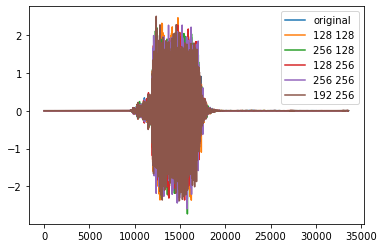


============ Sample 9 ============
Original:
Length: 2.58


Modified (128, 128)
torch.Size([128, 323])


Modified (256, 128)
torch.Size([128, 162])


Modified (128, 256)
torch.Size([256, 323])


Modified (256, 256)
torch.Size([256, 162])


Modified (192, 256)
torch.Size([256, 216])


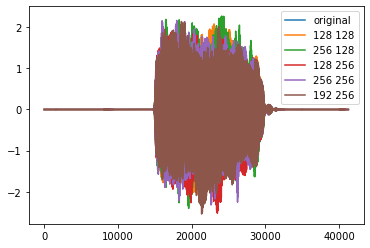

In [10]:
hop_length = 256
n_fft = 4 * 128
n_mels = 256


for i in range(10):
    print(f"============ Sample {i} ============")
    print("Original:")
    audio, sr = get_wav(i)
    print(f"Length: {audio.shape[0]/sr}")
    display_audio(audio, sr)
    plt.plot(audio, label="original")
    
    for config in [(128, 128), (256, 128), (128, 256), (256, 256), (192, 256)]:
        print(f"Modified {config}")
        hop_length, n_mels = config
        display_roundtrip_audio(audio, sr, hop_length, n_fft, n_mels)

    plt.legend()
    plt.show()
    
    print()